### **Introduction**
Humans are social beings and social media has grown to be a big part of that, It has become a staple at this point; From  making friends, to finding love, from the early days of facebook to making money as influencers on instagram or tiktok, or shaping our politacal landscape on twitter. It is an understatement to say that social media is a big part of our lives today. From a business' perspective social media can be the perfect tool for reaching your customers, be it marketing your product, announcing a new product or engaging with youor customers at a  personal level, It is a no brainer that socialmedia is the way to go. However, it is important to understand this big world of social media.

---

### **Purpose of the Analysis**
The purpose of this analysis is to dive into the  world of social media usage, Idenify trends and patterns within the socail landscape. This in a social media marketing scope can therefore be helpfull in order to undersand what, when and where to post in order to fully engage with your audience. Specific objectives include;
-What people spend most time on
-where people post the most
-Where people engage with the most
-Find out if the relation(if any) between Time spent on socials, posts per day, likes per day and follows per day

---

### **Dataset Overview**

It's a relatively small dataset with 1000 entries and 6 columns:

| **Column Name**           | **Description**                                                      |
|---------------------------|----------------------------------------------------------------------|
| **User_ID**               | Unique identifier that denotes the user                              |
| **App**                   | Popular social media sites used on a daily basis                     |
| **Daily_Minutes_Spent**   | Time spent on the app per day (cumulatively)                         |
| **Posts_Per_Day**         | Number of posts uploaded each day                                    |
| **Likes_Per_Day**         | Number of likes acquired on posts each day                           |
| **Follows_Per_Day**       | Number of followers gained each day                                  |

**Import necessary libraries**

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **Data overview**

In [3]:

df =  pd.read_csv('social_media_usage.csv')
df.head(10)

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21
5,U_6,Twitter,464,3,137,30
6,U_7,LinkedIn,229,1,188,25
7,U_8,LinkedIn,8,19,179,48
8,U_9,TikTok,80,7,14,25
9,U_10,Snapchat,428,6,4,41


In [4]:
df.sample(10)

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
198,U_199,LinkedIn,27,6,77,26
293,U_294,Twitter,269,10,121,14
63,U_64,Pinterest,341,13,4,41
455,U_456,Pinterest,225,11,100,24
327,U_328,Facebook,415,0,184,17
236,U_237,Snapchat,336,8,167,40
494,U_495,Snapchat,468,8,193,33
323,U_324,Twitter,92,7,150,32
435,U_436,Instagram,487,20,63,21
699,U_700,TikTok,281,8,43,17


**check the shape of the DataFrame**

In [5]:
df.shape

(1000, 6)

**general summary of the data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   App                  1000 non-null   object
 2   Daily_Minutes_Spent  1000 non-null   int64 
 3   Posts_Per_Day        1000 non-null   int64 
 4   Likes_Per_Day        1000 non-null   int64 
 5   Follows_Per_Day      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


**statistical summary of the data**

In [7]:
df.describe()

,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,247.368000,10.269000,94.682000,24.698000
std,146.371921,6.121774,57.560943,14.842948
min,5.000000,0.000000,0.000000,0.000000
25%,112.750000,5.000000,44.750000,12.000000
50%,246.000000,10.000000,94.000000,24.000000
75%,380.500000,16.000000,142.000000,38.000000
max,500.000000,20.000000,200.000000,50.000000


# **Data Cleaning**
_its a generally clean dataset, however it is necessary to do an overview before any major analysis is done_

In [8]:
df.isnull().sum() # check for null values

User_ID                0
App                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64

In [9]:
df.dtypes

User_ID                object
App                    object
Daily_Minutes_Spent     int64
Posts_Per_Day           int64
Likes_Per_Day           int64
Follows_Per_Day         int64
dtype: object

**check for duplicates**

In [10]:
df.duplicated().sum()

np.int64(0)

# **General Analysis**

In [11]:
df.head()

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21


**App by users**

App
Snapchat     156
LinkedIn     147
TikTok       141
Pinterest    140
Instagram    140
Twitter      140
Facebook     136
Name: count, dtype: int64


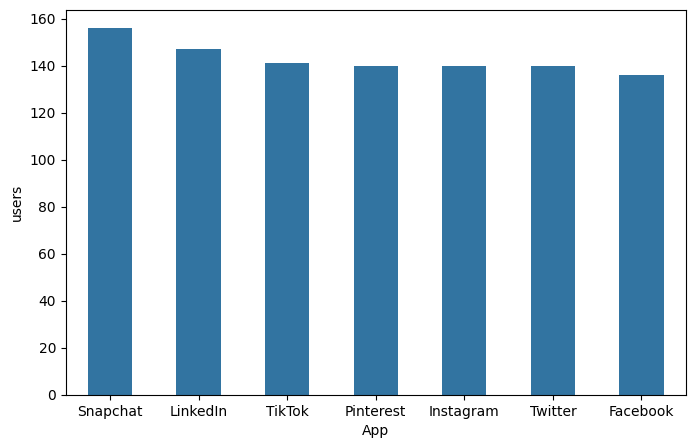

In [12]:
# apps according to the number of  users within our sample
data = df.App.value_counts()
print(data)

plt.figure(figsize=(8, 5))
sns.barplot(data=data, width=0.5)
plt.ylabel("users")
plt.show()

**Total time spent on each app**

App
TikTok       32912
Pinterest    33069
Facebook     33615
LinkedIn     34700
Twitter      36076
Instagram    36974
Snapchat     40022
Name: Daily_Minutes_Spent, dtype: int64


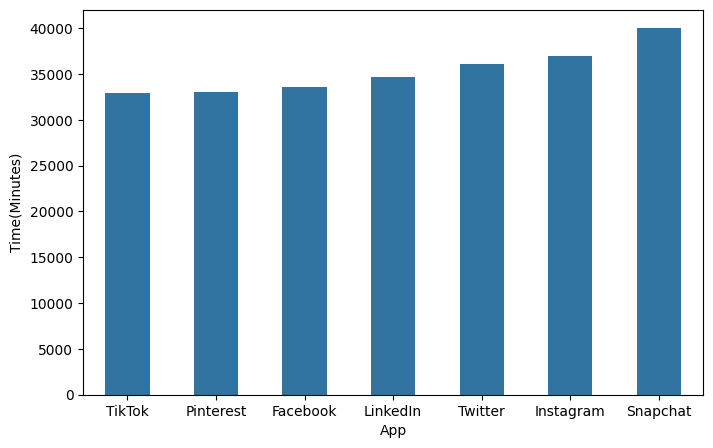

In [13]:
data = df.groupby('App')['Daily_Minutes_Spent'].sum().sort_values(ascending=True)
print(data)

plt.figure(figsize=(8, 5))
sns.barplot(data=data, width=0.5)
plt.ylabel("Time(Minutes)")
plt.show()

**Maximum time any user has spent on the app**

In [23]:
df.groupby('App')['Daily_Minutes_Spent'].max().sort_values(ascending=False)

App
Pinterest    500
Instagram    499
Facebook     498
TikTok       498
LinkedIn     495
Twitter      494
Snapchat     492
Name: Daily_Minutes_Spent, dtype: int64

**Total daily posts on each app**

App
Facebook     1295
TikTok       1348
Pinterest    1488
LinkedIn     1496
Twitter      1496
Snapchat     1560
Instagram    1586
Name: Posts_Per_Day, dtype: int64


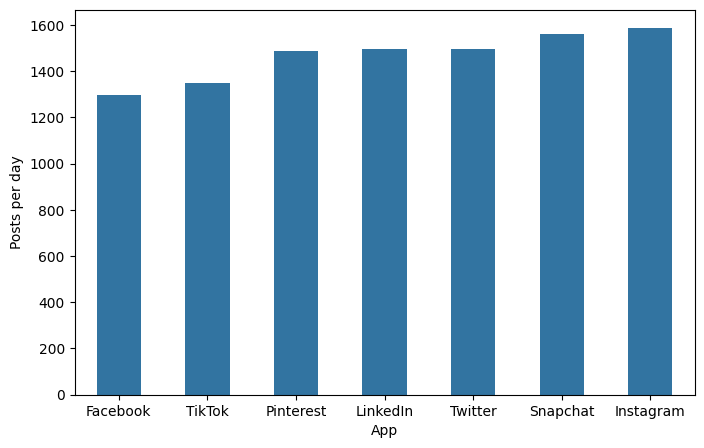

In [14]:
data = df.groupby('App')['Posts_Per_Day'].sum().sort_values(ascending=True)
print(data)

plt.figure(figsize=(8, 5))
sns.barplot(data=data, width=0.5)
plt.ylabel("Posts per day")
plt.show()

**Maximum posts a user has uploaded**

In [25]:
df.groupby('App')['Posts_Per_Day'].max().sort_values(ascending=True)

App
Facebook     20
Instagram    20
LinkedIn     20
Pinterest    20
Snapchat     20
TikTok       20
Twitter      20
Name: Posts_Per_Day, dtype: int64

**Total daily likes on each app**

*_engagements measure_

App
Twitter      12626
TikTok       12889
Pinterest    12896
Facebook     13505
Instagram    13859
LinkedIn     14271
Snapchat     14636
Name: Likes_Per_Day, dtype: int64


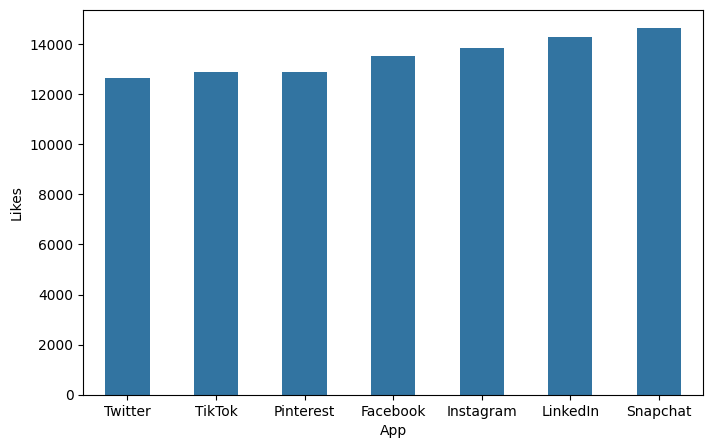

In [29]:
data=df.groupby('App')['Likes_Per_Day'].sum().sort_values(ascending=True)
print(data)

# Seaborn minimalist style

plt.figure(figsize=(8, 5))
sns.barplot(data=data, width=0.5)
plt.ylabel("Likes")
plt.show()

**Maximum likes a user has gotten on a post**

In [34]:
df.groupby('App')['Likes_Per_Day'].max().sort_values(ascending=False)

App
Snapchat     200
Twitter      200
Facebook     199
TikTok       199
Instagram    198
LinkedIn     198
Pinterest    195
Name: Likes_Per_Day, dtype: int64

**Total daily Follows on each app**

App
Facebook     3144
Twitter      3350
TikTok       3446
Pinterest    3471
Instagram    3621
LinkedIn     3687
Snapchat     3979
Name: Follows_Per_Day, dtype: int64


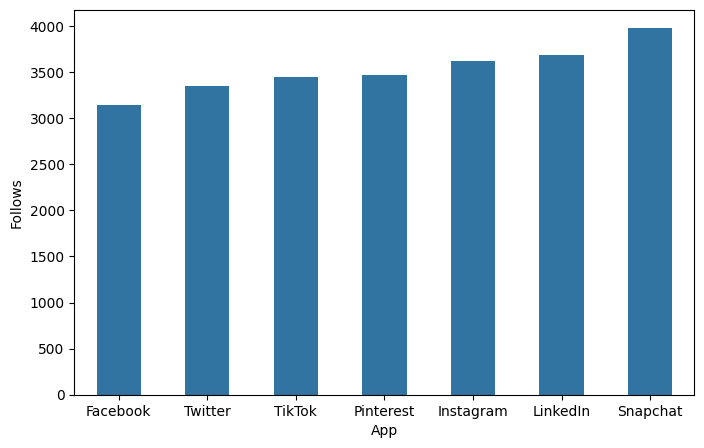

In [30]:
data=df.groupby('App')['Follows_Per_Day'].sum().sort_values(ascending=True)
print(data)

# Seaborn minimalist style

plt.figure(figsize=(8, 5))
sns.barplot(data=data, width=0.5)
plt.ylabel("Follows")
plt.show()



**Maximum Followers a user has gained in a day**

In [36]:
df.groupby('App')['Follows_Per_Day'].max().sort_values(ascending=False)

App
Facebook     50
Instagram    50
LinkedIn     50
Pinterest    50
Snapchat     50
TikTok       50
Twitter      49
Name: Follows_Per_Day, dtype: int64

# **Average User Engagement Analysis**

**Average time spent on the app**

App
TikTok       233.418440
LinkedIn     236.054422
Pinterest    236.207143
Facebook     247.169118
Snapchat     256.551282
Twitter      257.685714
Instagram    264.100000
Name: Daily_Minutes_Spent, dtype: float64


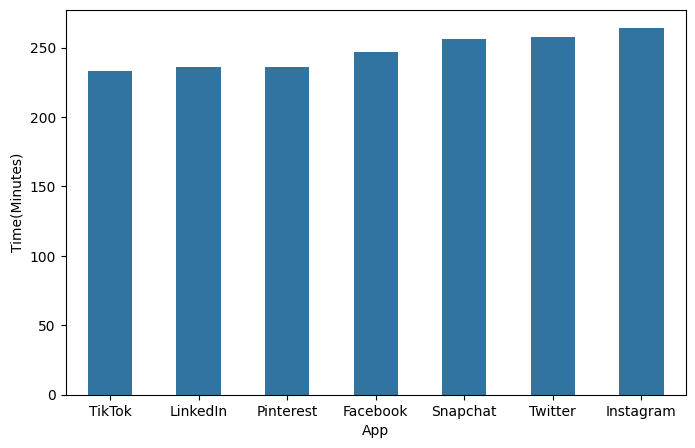

In [17]:
data = df.groupby('App')['Daily_Minutes_Spent'].mean().sort_values(ascending=True)
print(data)

plt.figure(figsize=(8, 5))
sns.barplot(data=data, width=0.5)
plt.ylabel("Time(Minutes)")
plt.show()

**Average Number of posts users put up**

App
Facebook      9.522059
TikTok        9.560284
Snapchat     10.000000
LinkedIn     10.176871
Pinterest    10.628571
Twitter      10.685714
Instagram    11.328571
Name: Posts_Per_Day, dtype: float64


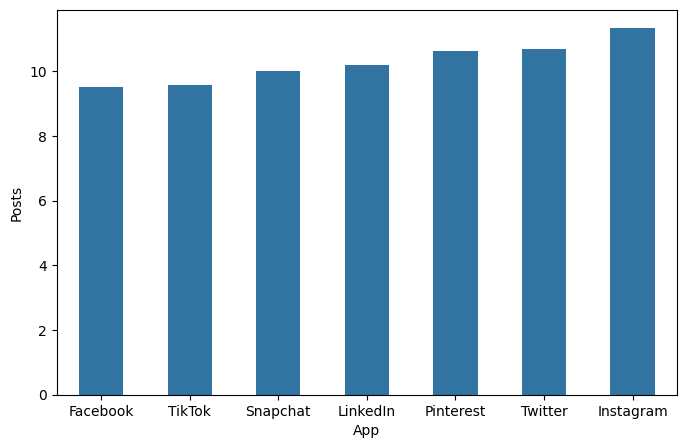

In [18]:
data = df.groupby('App')['Posts_Per_Day'].mean().sort_values(ascending=True)
print(data)

plt.figure(figsize=(8, 5))
sns.barplot(data=data, width=0.5)
plt.ylabel("Posts")
plt.show()

**Average number of Likes users recieve**

           Likes_Per_Day
App                     
Twitter        90.185714
TikTok         91.411348
Pinterest      92.114286
Snapchat       93.820513
LinkedIn       97.081633
Instagram      98.992857
Facebook       99.301471


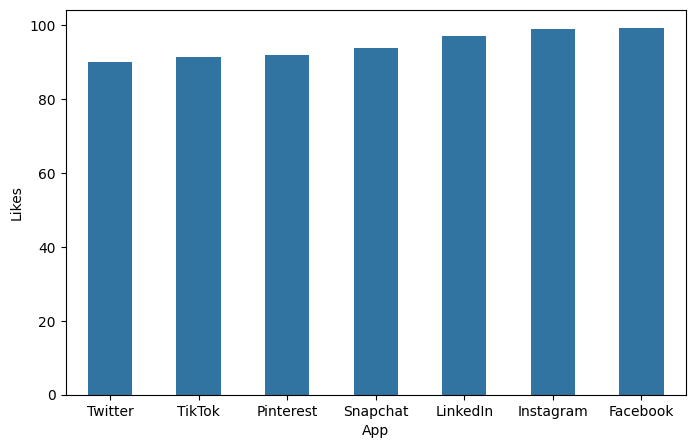

In [19]:
data=df.groupby('App')[['Likes_Per_Day']].mean().sort_values(ascending=True, by='Likes_Per_Day')
print(data)


plt.figure(figsize=(8, 5))
sns.barplot(data=data, y='Likes_Per_Day',x='App',width=0.5)
plt.ylabel("Likes")
plt.show()

**Average number of followers users gain on apps**

           Follows_Per_Day
App                       
Facebook              3144
Twitter               3350
TikTok                3446
Pinterest             3471
Instagram             3621
LinkedIn              3687
Snapchat              3979


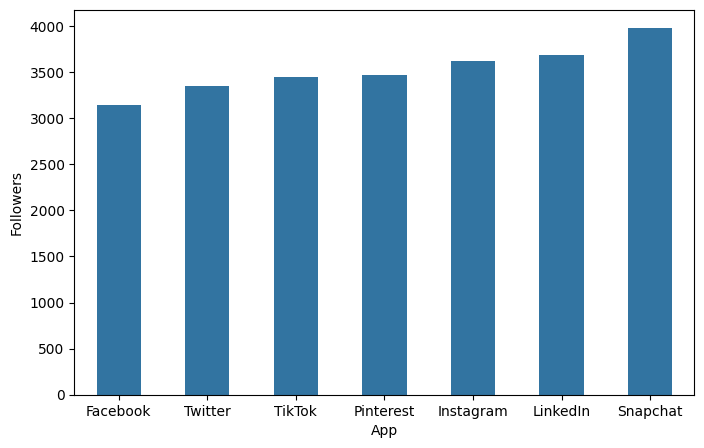

In [20]:
data=df.groupby('App')[['Follows_Per_Day']].sum().sort_values(ascending=True, by='Follows_Per_Day')
print(data)

plt.figure(figsize=(8, 5))
sns.barplot(data=data, y='Follows_Per_Day',x='App',width=0.5)
plt.ylabel("Followers")
plt.show()

# **Relations Analysis**

** bubb**

In [44]:
df.iloc[:, 2:].corr()

,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
Daily_Minutes_Spent,1.000000,-0.023968,0.013545,0.037521
Posts_Per_Day,-0.023968,1.000000,0.016892,0.018113
Likes_Per_Day,0.013545,0.016892,1.000000,-0.017476
Follows_Per_Day,0.037521,0.018113,-0.017476,1.000000
